In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

# Reading Data

In [2]:
df = pd.read_csv("Invistico_Airline.csv")
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


# Data Info

In [3]:
pd.DataFrame({"Null":df.isna().sum(),
             "Data Types":df.dtypes,
             "Unique":df.nunique(),
             "Dublecates":df.duplicated().sum()}).T

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,393
Data Types,object,object,int64,object,object,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64
Unique,2,2,75,2,3,5398,6,6,6,6,...,6,6,6,6,5,6,6,6,466,472
Dublecates,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cols = df.columns.to_list()
cols

['satisfaction',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

# reorder columns

In [5]:
x = cols.pop(0)
cols.append(x)

In [6]:
df = df[cols]
df

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,...,2,3,3,4,4,4,2,0,0.0,satisfied
129876,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,...,3,2,3,3,1,2,1,174,172.0,dissatisfied
129877,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,...,4,4,3,4,2,3,2,155,163.0,dissatisfied
129878,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,...,3,3,2,3,2,1,2,193,205.0,dissatisfied


# Dropping NaN values

In [7]:
df.dropna(axis=0 , inplace=True)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_14276\3852510395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0 , inplace=True)


In [8]:
pd.DataFrame({"Null":df.isna().sum(),
             "Data Types":df.dtypes,
             "Unique":df.nunique(),
             "Dublecates":df.duplicated().sum()}).T

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Data Types,object,int64,object,object,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,float64,object
Unique,2,75,2,3,5397,6,6,6,6,6,...,6,6,6,5,6,6,6,464,472,2
Dublecates,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,...,2,3,3,4,4,4,2,0,0.0,satisfied
129876,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,...,3,2,3,3,1,2,1,174,172.0,dissatisfied
129877,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,...,4,4,3,4,2,3,2,155,163.0,dissatisfied
129878,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,...,3,3,2,3,2,1,2,193,205.0,dissatisfied


In [10]:
pd.DataFrame({"Null":df.isna().sum(),
             "Data Types":df.dtypes,
             "Unique":df.nunique(),
             "Dublecates":df.duplicated().sum()}).T

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Data Types,object,int64,object,object,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,float64,object
Unique,2,75,2,3,5397,6,6,6,6,6,...,6,6,6,5,6,6,6,464,472,2
Dublecates,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
object_cols = ["Customer Type","Type of Travel","Class","Seat comfort","Departure/Arrival time convenient","Food and drink","Gate location","Inflight wifi service","Inflight entertainment","Online support","Ease of Online booking","On-board service","Leg room service","Baggage handling","Checkin service","Cleanliness","Online boarding","satisfaction"]

# Data Visulaization 

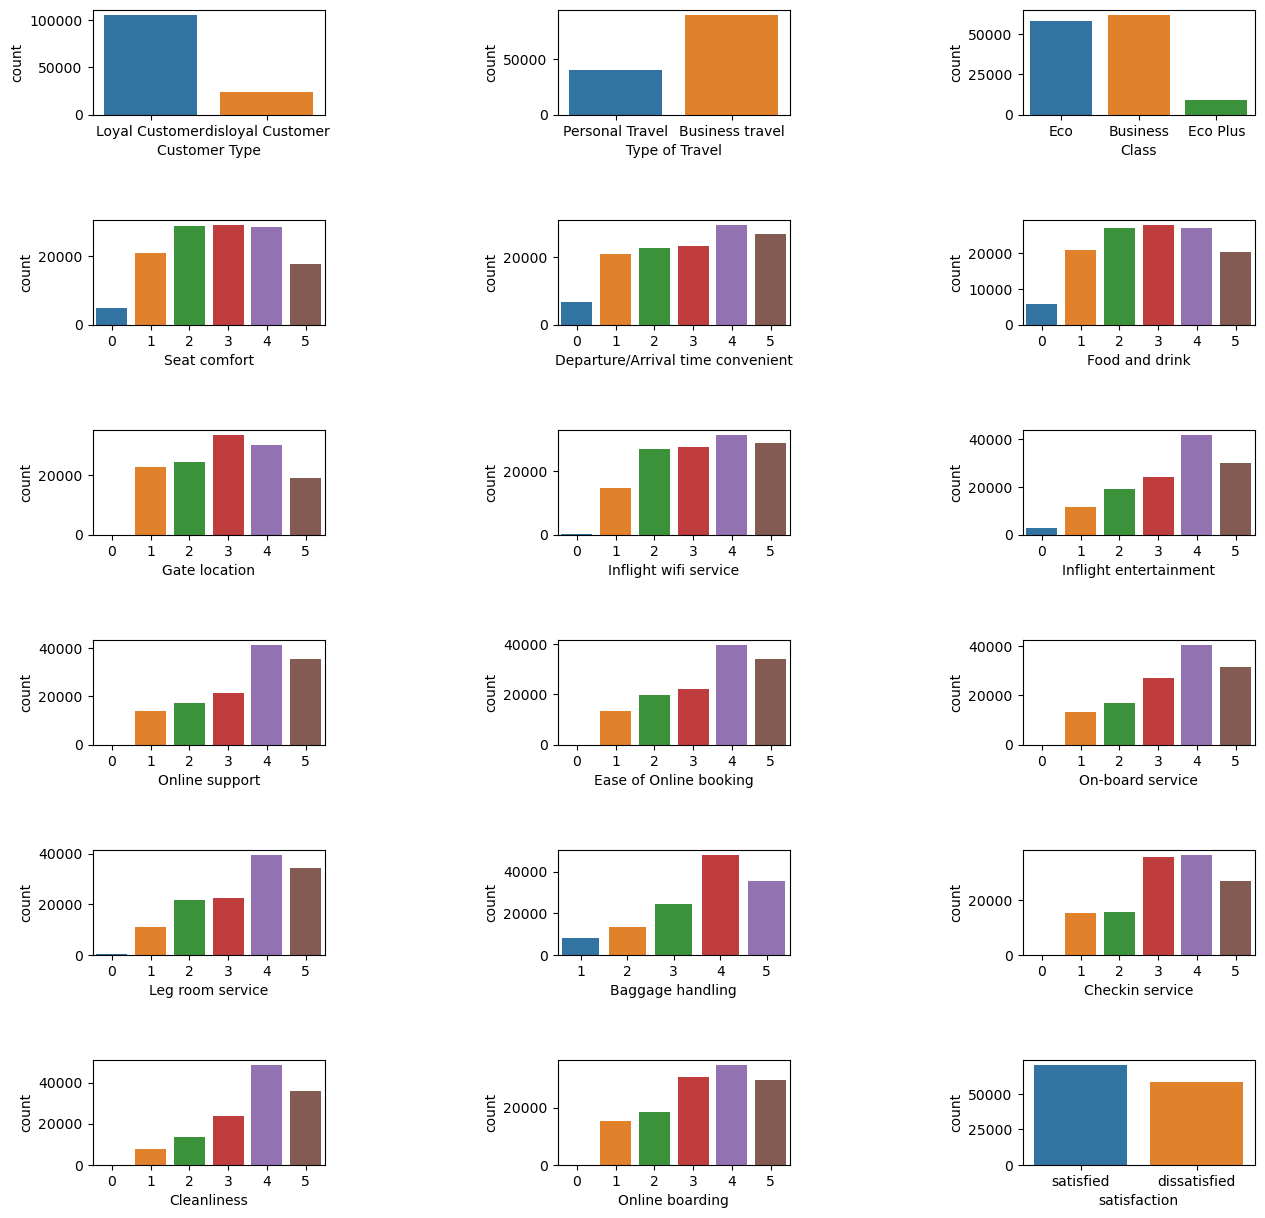

In [12]:
plt.figure(figsize=(15,15))
for i , col in enumerate(df[object_cols]):
    plt.subplot(6,3,i+1)
    sns.countplot(data=df , x=col)
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

In [13]:
df.describe(include="object")

,Customer Type,Type of Travel,Class,satisfaction
count,129487,129487,129487,129487
unique,2,2,3,2
top,Loyal Customer,Business travel,Business,satisfied
freq,105773,89445,61990,70882


In [14]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Statse

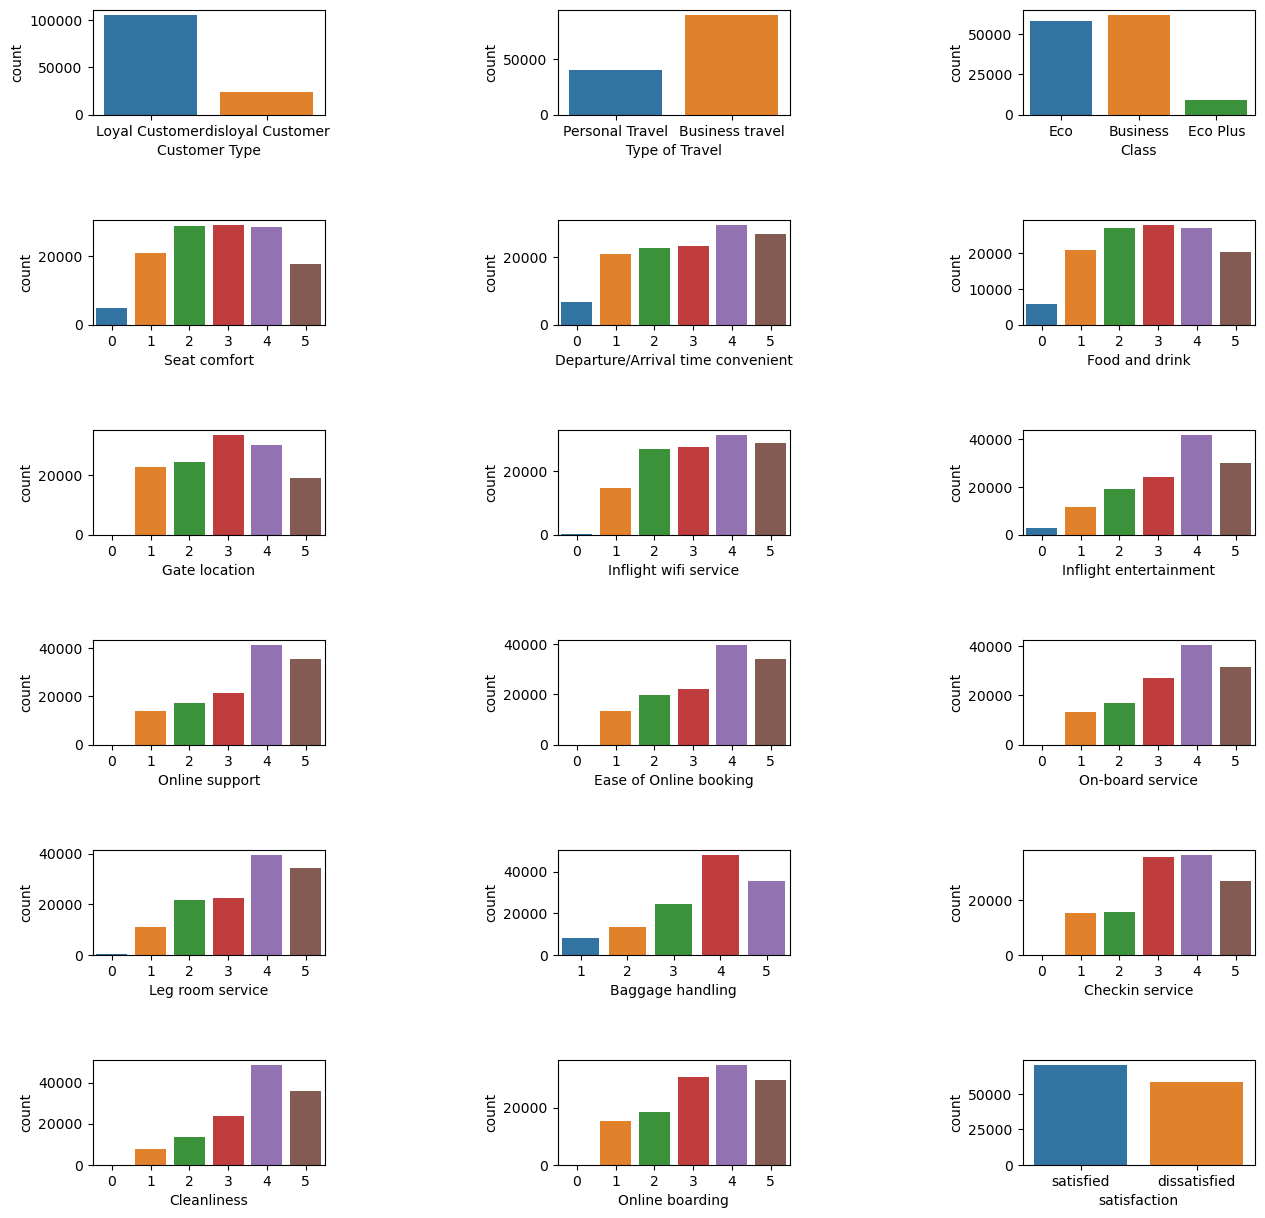

In [15]:
plt.figure(figsize=(15,15))
for i , col in enumerate(df[object_cols]):
    plt.subplot(6,3,i+1)
    sns.countplot(data=df , x=col)
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

# Convert Object columns to Category columns

In [16]:
category_cols = ["Customer Type","Type of Travel","Class","Seat comfort","Departure/Arrival time convenient","Food and drink","Gate location","Inflight wifi service","Inflight entertainment","Online support","Ease of Online booking","On-board service","Leg room service","Baggage handling","Checkin service","Cleanliness","Online boarding","satisfaction"]

In [17]:
df[category_cols] = df[category_cols].astype("category")

C:\Users\mahmo\AppData\Local\Temp\ipykernel_14276\2215681354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category_cols] = df[category_cols].astype("category")


# Data Visulaization

In [18]:
nom_cols = df.select_dtypes("number").columns.to_list()
df[nom_cols]

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0.0
1,47,2464,310,305.0
2,15,2138,0,0.0
3,60,623,0,0.0
4,70,354,0,0.0
...,...,...,...,...
129875,29,1731,0,0.0
129876,63,2087,174,172.0
129877,69,2320,155,163.0
129878,66,2450,193,205.0


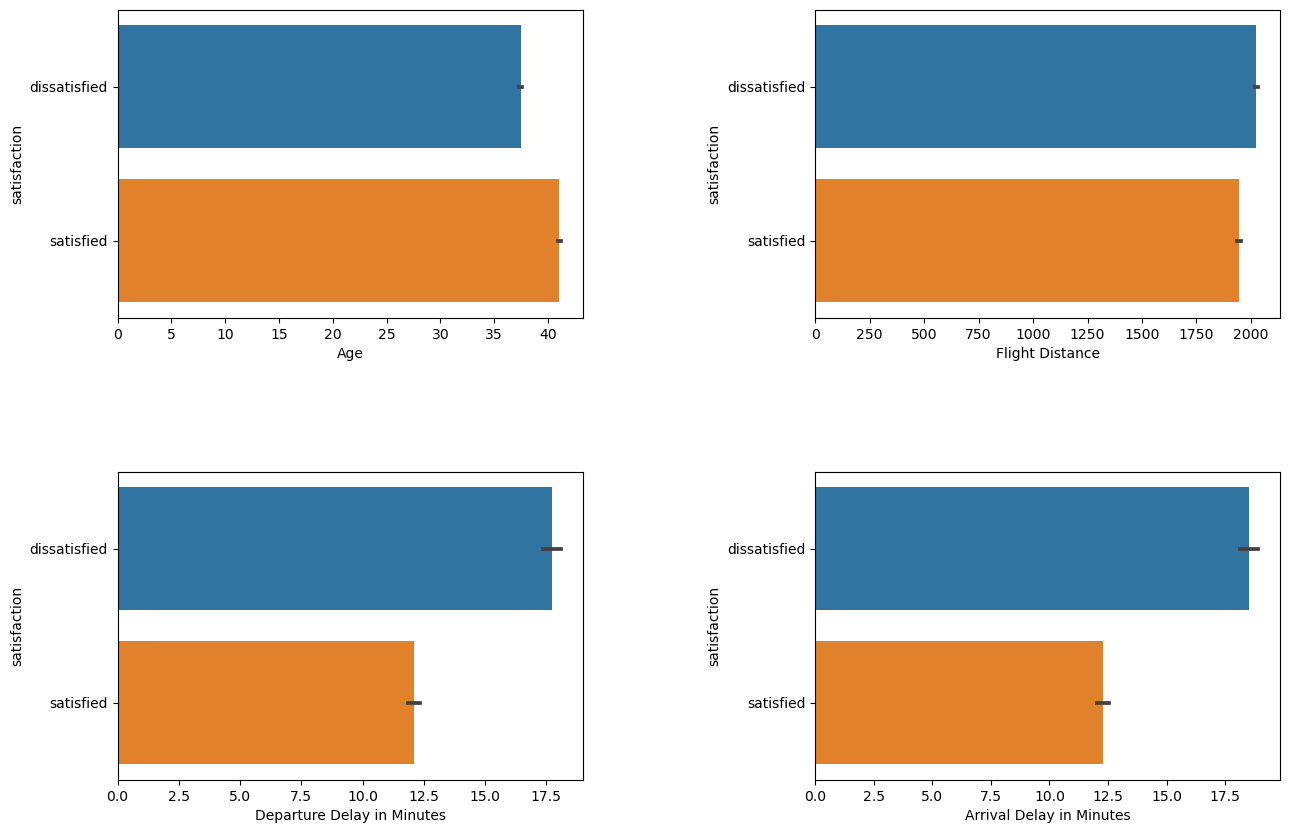

In [19]:
plt.figure(figsize=(15,10))
for i , col in enumerate(df[nom_cols]):
    plt.subplot(2,2,i+1)
    sns.barplot(data=df , x=col,y="satisfaction")
plt.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Age'>

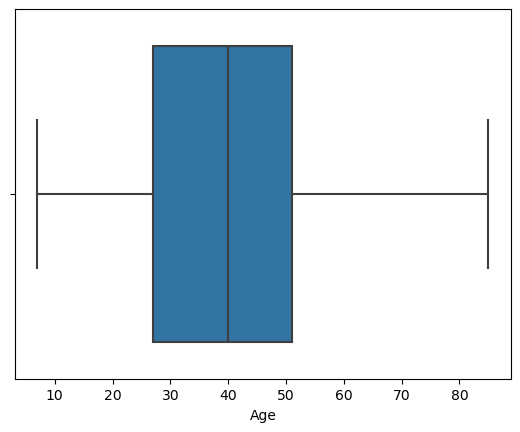

In [20]:
sns.boxplot(df["Age"])

# Dropping unessery columns

In [21]:
df.drop(columns=["Departure Delay in Minutes","Arrival Delay in Minutes"], axis=1 , inplace=True)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_14276\997664101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Departure Delay in Minutes","Arrival Delay in Minutes"], axis=1 , inplace=True)


In [22]:
pd.DataFrame({"Null":df.isna().sum(),
             "Data Types":df.dtypes,
             "Unique":df.nunique(),
             "Dublecates":df.duplicated().sum()}).T

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,satisfaction
Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Data Types,category,int64,category,category,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category
Unique,2,75,2,3,5397,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
Dublecates,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [23]:
df = df.drop_duplicates()

In [24]:
pd.DataFrame({"Null":df.isna().sum(),
             "Data Types":df.dtypes,
             "Unique":df.nunique(),
             "Dublecates":df.duplicated().sum()}).T

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,satisfaction
Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Data Types,category,int64,category,category,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,category,category
Unique,2,75,2,3,5397,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
Dublecates,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,satisfaction
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,satisfied
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,satisfied
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,satisfied
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,satisfied
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,satisfied
129876,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,dissatisfied
129877,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,dissatisfied
129878,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,dissatisfied


# Splitting Data

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [28]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.2 , shuffle=True)


# Normalaization

In [29]:
nom_cols = df.select_dtypes("number").columns.to_list()
X_train[nom_cols]

,Age,Flight Distance
32901,66,2290
128899,31,5094
124663,32,4081
44899,30,1487
99192,31,1771
...,...,...
24837,12,2133
14388,31,1566
89122,28,1572
35611,40,3596


In [30]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()


X_train[nom_cols] = X_scaler.fit_transform(X_train[nom_cols])
X_test[nom_cols] = X_scaler.transform(X_test[nom_cols])



# Encoding

In [31]:
cat_cols = df.select_dtypes("category").columns.to_list()[:-1]
X_train[cat_cols]


,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
32901,Loyal Customer,Personal Travel,Eco,4,2,4,3,1,4,1,1,3,5,3,1,3,1
128899,Loyal Customer,Business travel,Business,1,1,1,1,5,5,5,5,2,2,2,4,3,5
124663,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,3,3,4,3,5,5
44899,disloyal Customer,Business travel,Eco,2,0,2,3,5,2,5,5,3,2,1,1,1,5
99192,Loyal Customer,Business travel,Business,4,4,4,4,4,4,4,4,3,2,5,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24837,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,5,5,4,4,5
14388,Loyal Customer,Personal Travel,Eco,2,4,2,3,4,2,4,4,4,4,4,4,4,4
89122,Loyal Customer,Business travel,Business,4,4,4,4,4,4,3,4,4,3,2,5,4,4
35611,Loyal Customer,Personal Travel,Eco,4,4,4,4,2,4,2,2,2,2,3,3,3,2


In [38]:
cols_encd = ["Customer Type" ,"Type of Travel","Class"]

X_train = pd.get_dummies(data= X_train , columns=cols_encd , drop_first=True)
X_test = pd.get_dummies(data= X_test , columns=cols_encd , drop_first=True)

In [40]:
y_train = pd.get_dummies(data= y_train , columns=["satisfaction"] , drop_first=True)
y_test = pd.get_dummies(data= y_test , columns=["satisfaction"] , drop_first=True)

# SVC_Model

In [46]:
from sklearn.svm import SVC

svm_model = SVC(kernel="liner" , C=1 )

# Cross validation

In [47]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(svm_model , X_train , y_train , cv=5)

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [48]:
score.mean()

0.9235625949026558

In [49]:
score.std()

0.0018184394977463893

In [50]:
score

array([0.92127618, 0.92190366, 0.92542716, 0.92339624, 0.92580972])

# Grid Search
- Random Forest Classifier Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

rdc = RandomForestClassifier(n_estimators=10)
rdc.fit(X_train,y_train)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_14276\2981502015.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [62]:
from sklearn.model_selection import GridSearchCV

prams = {"n_estimators":(10,20)}
rdc_gs = GridSearchCV(rdc , prams)
rdc_gs.fit(X_train,y_train)

C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mahmo\anaconda3\envs\storm\Lib\site-packages\sklearn\model_selection\_validation.py:686:

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'n_estimators': (10, 20)})

In [63]:
rdc_gs.best_estimator_

RandomForestClassifier(n_estimators=20)

In [64]:
rdc_gs.best_params_

{'n_estimators': 20}

In [65]:
rdc_gs.best_score_

0.9509692319421059

# Fainal Test

In [66]:
from sklearn.metrics import accuracy_score

random_F = rdc_gs.best_estimator_
tr_pred = random_F.predict(X_train)

accuracy_score(y_train,tr_pred)

0.9994207823299996